<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Береги-уровень-значимости-с-молоду" data-toc-modified-id="Береги-уровень-значимости-с-молоду-1">Береги уровень значимости с молоду</a></span><ul class="toc-item"><li><span><a href="#Песнь-льда-и-пламени" data-toc-modified-id="Песнь-льда-и-пламени-1.1">Песнь льда и пламени</a></span></li><li><span><a href="#Формализация-задачи:" data-toc-modified-id="Формализация-задачи:-1.2">Формализация задачи:</a></span><ul class="toc-item"><li><span><a href="#Коррекция-Бонферрони" data-toc-modified-id="Коррекция-Бонферрони-1.2.1">Коррекция Бонферрони</a></span></li><li><span><a href="#Метод-Холма" data-toc-modified-id="Метод-Холма-1.2.2">Метод Холма</a></span></li><li><span><a href="#Метод-Бенджамини-Хохберга" data-toc-modified-id="Метод-Бенджамини-Хохберга-1.2.3">Метод Бенджамини-Хохберга</a></span></li></ul></li></ul></li><li><span><a href="#Сколько-нужно-наблюдений" data-toc-modified-id="Сколько-нужно-наблюдений-2">Сколько нужно наблюдений</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-о-кнопке" data-toc-modified-id="Гипотеза-о-кнопке-2.1">Гипотеза о кнопке</a></span></li><li><span><a href="#Другие-тесты" data-toc-modified-id="Другие-тесты-2.2">Другие тесты</a></span></li><li><span><a href="#Кривые-мощности" data-toc-modified-id="Кривые-мощности-2.3">Кривые мощности</a></span></li></ul></li><li><span><a href="#Бутстрап" data-toc-modified-id="Бутстрап-3">Бутстрап</a></span><ul class="toc-item"><li><span><a href="#Д.И.-для-среднего-(пример-про-копилку)" data-toc-modified-id="Д.И.-для-среднего-(пример-про-копилку)-3.1">Д.И. для среднего (пример про копилку)</a></span><ul class="toc-item"><li><span><a href="#Д.И.-Эфрона" data-toc-modified-id="Д.И.-Эфрона-3.1.1">Д.И. Эфрона</a></span></li><li><span><a href="#Д.И.-Холла" data-toc-modified-id="Д.И.-Холла-3.1.2">Д.И. Холла</a></span></li><li><span><a href="#t-процентильный-Д.И." data-toc-modified-id="t-процентильный-Д.И.-3.1.3">t-процентильный Д.И.</a></span></li></ul></li><li><span><a href="#Д.И.-для-медианы-(цитаты-и-репосты)" data-toc-modified-id="Д.И.-для-медианы-(цитаты-и-репосты)-3.2">Д.И. для медианы (цитаты и репосты)</a></span></li></ul></li></ul></div>

#  Сколько нужно наблюдений

Посмотрим на то, как для конкретных критериев можно расчитывать число наблюдений питоновскими средствами.

## Гипотеза о кнопке

Посмотрим на пример с долями. У нас есть две кнопки: старая и новая. Мы хотим проверить гипотезу о том, что доля нажатий по обеим кнопкам совпадает. В качестве альтернативы рассматриваем вариант, что новый дизайн кнопки оказался лучше и нажать на неё хочется больше.

$$
\begin{aligned}
&H_0: \hspace{2mm} p_0 = p_a \\
&H_1: \hspace{2mm} p_0 < p_a  
\end{aligned}
$$

Величины $p_0$ и $p_a$ мы оцениваем, как отношение кликов на кнопку к показам в контрольной группе и в тестовой группе. Число наблюдений, которое нам необходимо, в таком случае, можно найти по формуле:

$$
n = \left( \frac{\sqrt{p_0 \cdot (1 - p_0) } \cdot z_{1 - \alpha} + \sqrt{p_a \cdot (1 - p_a) } \cdot z_{1 - \beta} }{p_a - p_0}  \right)^2,
$$

где $n$- число наблюдений, $\alpha$ - ошибка первого рода, $\beta$ - ошибка второго рода, $z_{1 - \alpha}, z_{1 - \beta}$ - квантили нормального распределения.


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from tqdm import tqdm as tqdm_botebook

plt.style.use('ggplot')

In [ ]:
def get_size(p0, pa, alpha, beta):
    za = stats.norm.ppf(1 - alpha)
    zb = stats.norm.ppf(1 - beta)
    n = (za * np.sqrt(p0*(1 - p0)) + zb * np.sqrt(pa*(1-pa)) / (pa - p0))**2
    return int(np.ceil(n))

alpha = 0.05
beta = 0.05

# сколько наблюдений надо, чтобы получить ошибки alpha и beta и уловить минимальный эффект pa - p0
get_size(0.30, 0.31, alpha, beta)

5903

In [ ]:
errors_prob = np.arange(0.01,0.06,0.01)
p_0s = np.arange(0, 0.15, 0.01)
pd.DataFrame([[get_size(p_0, 0.15, er, er) for er in errors_prob] for p_0 in p_0s],
            columns=errors_prob, index=p_0s[::-1]+0.01)

#print([[y for y in np.arange(x)] for x in np.arange(5)])


,0.01,0.02,0.03,0.04,0.05
0.15,31,24,21,18,16
0.14,39,30,25,22,19
0.13,46,36,30,26,23
0.12,54,42,36,31,27
0.11,65,50,42,37,33
0.10,78,61,51,44,39
0.09,96,75,63,55,48
0.08,121,94,79,69,61
0.07,157,122,103,89,79
0.06,211,165,138,120,106


Теперь посчитаем тоже самое с помощью пакета `statsmodels`. Внутри него есть функция `zt_ind_solve_power`. Она может использоваться, чтобы найти любой из параметров: мощность, число наблюдений, эффект, уровень значимости. Три известные части информации подставляются в функцию. Вместо неизвестной пишется `None`.

Обратите внимание, что в качестве размера эффекта в функцию подаётся стандартизированный эффект, а не оригинальный (отнормированный на стандартное отклонение)

$$
effect = \frac{p_0 - p_a}{se},
$$

при этом стандартная ошибка считается как

$$
se = \sqrt{\frac{(n_1 - 1)\cdot s_1^2 + (n_2 - 1) \cdot s_2^2 }{n_1 + n_2 - 2}}.
$$

In [ ]:
n_0, n_a = 468, 468   # размеры выборок
p_0, p_a = 0.10, 0.15  # доли

# дисперсии
var_0 = p_0 * (1 - p_0)
var_a = p_a * (1 - p_a)

# стандартизированный размер эффекта
standartized_effect = \
    (p_a - p_0) / \
    np.sqrt(( (n_0-1) * var_0 + (n_a-1) * var_a) / (n_0 + n_a - 2))

standartized_effect

0.15161960871578062

In [ ]:
from statsmodels.stats.power import zt_ind_solve_power

alpha = 0.05
beta = 0.05

# параметр ratio отвечает за то в какой из двух выборок больше наблюдений
sample_size = zt_ind_solve_power(
                    effect_size=standartized_effect,  # стандартизованный размер эффекта
                    nobs1=None,           # число наблюдений None, тк их хотим найти
                    alpha=alpha,          # уровень значимости
                    power=(1 - beta),     # мощность
                    ratio=1,              # перекос в выборках, если 0, тогда выборка только одна
                    alternative='larger'  # альтернатива
                )

print(sample_size) # у нас две выборки, на каждую поровну

941.5291210637375


Подставив `None` вместо другого аргумента функции, можем рассчитать что-нибудь ещё. Например, мощность теста.

In [ ]:
zt_ind_solve_power(effect_size=0.15219,
                   nobs1=941,
                   alpha=None,
                   power=1-beta,
                   ratio=1,
                   alternative='larger')

0.04883248357463442

Или размер эффекта.

In [ ]:
zt_ind_solve_power(effect_size=None,
                   nobs1=2*167,
                   alpha=alpha,
                   power=1-beta,
                   ratio=1,
                   alternative='larger')

0.2545634706041842

По аналогии можно работать с любой асимптотически нормальной статистикой.

## Другие тесты

По аналогии реализованы [многие другие тесты.](https://www.statsmodels.org/stable/stats.html) Например, тест Стьюдента. Рассмотрим тест для равенства средних при неизвестных, но равных дисперсиях.

Класс `TTestIndPower` предназначен для анализа мощности для t-теста Стьюдента с независимыми выборками (`TTestPower` для обычного либо с зависимыми выборками).

У каждого объекта этого класса есть метод `solve_power`. Он может использоваться, чтобы найти любой из параметров: мощность, число наблюдений, эффект, уровень значимости. Три известные части информации подставляются в функцию. Вместо неизвестной ствится `None`.

Снова в качестве эффекта на вход идёт стандартизованный эффект:

$$
effect = \frac{\bar{x_1} - \bar{x_2}}{se},
$$


In [ ]:
from statsmodels.stats.power import TTestIndPower

effect = 0.5
alpha = 0.05
power = 0.95

analysis = TTestIndPower()
analysis.solve_power(effect,
                     nobs1=None,
                     power=power,
                     alpha=alpha,
                     ratio=1)

104.92794663444455

## Кривые мощности

Построим для мощностей кривые. Они будут показывать размер эффекта и размер выборки влияют на мощность теста.

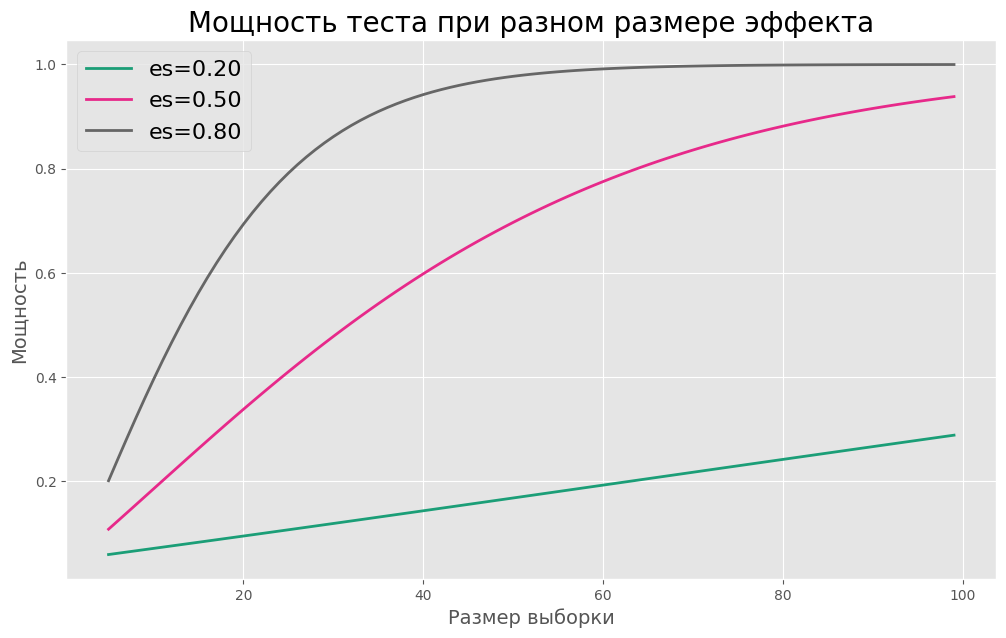

In [ ]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))

analysis = TTestIndPower()

_, axes = plt.subplots(1, 1, figsize=(12,7))

analysis.plot_power(
    dep_var='nobs',
    nobs=sample_sizes,
    effect_size=effect_sizes,
    ax=axes
)

axes.set_title("Мощность теста при разном размере эффекта", fontsize=20)
axes.set_xlabel("Размер выборки", fontsize=14)
axes.set_ylabel("Мощность", fontsize=14)
plt.legend(fontsize=16);

На графике мы видим как меняется мощность критерия при трёх разных размерах эффекта. Если нас интересует большой эффект, то мы выходим к единице при примерно $60$ наблюдениях.

#  Береги уровень значимости с молоду

In [11]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from tqdm import tqdm as tqdm_botebook

from statsmodels.stats.multitest import multipletests

plt.style.use('ggplot')

## Песнь льда и пламени

Говорят, Джордж Р.Р. Мартин, автор цикла "Песнь Льда и Пламени", истребляет Старков: чаще убивает персонажей, относящихся к этому дому, чем персонажей других домов. В таблице ниже приведено количество персонажей, относящихся к тому или иному дому, упомянутых за первые $4$ книги, а так же количество погибших персонажей.

| Дом | Упомянутые персонажи | Погибшие персонажи |
|-----|---------------------|------|
|House Stark	| 70 | 25 |
|House Lannister | 38 | 7 |
|House Greyjoy | 41 | 12 |
|Night's Watch |105 | 41 |

Нужно проверить гипотезу об этом на $5\%$ уровне значимости.

## Формализация задачи:

Нам нужно проверить гипотезу о том, что доля смертей среди Старков совпадает со всеми остальными долями против альтернативы, что хотя бы в одной из ситуаций смертность в доме Старков больше:

\begin{equation*}
\begin{aligned}
& H_0: p_S = p_L = p_G = p_{NW}  \\
& H_1: \text{хотя бы одна вероятность отличается}  
\end{aligned}
\end{equation*}

Протестируем все гипотезы без коррекции на множественное тестирование, а потом введём её.

In [3]:
n_st = 70
m_st = 25

n_lan = 38
m_lan = 7

n_gr = 41
m_gr = 12

n_nw = 105
m_nw = 41

alpha = 0.05

In [4]:
m_st/n_st, m_lan/n_lan, m_gr/n_gr, m_nw/n_nw

(0.35714285714285715,
 0.18421052631578946,
 0.2926829268292683,
 0.3904761904761905)

Проверяем три гипотезы!

In [5]:
from statsmodels.stats.proportion import proportions_ztest

_, p1 =  proportions_ztest((m_st, m_lan),
                           (n_st, n_lan),
                           value=0,
                           alternative='larger')


_, p2 =  proportions_ztest((m_st, m_gr),
                           (n_st, n_gr),
                           value=0,
                           alternative='larger')

_, p3 =  proportions_ztest((m_st, m_nw),
                           (n_st, n_nw),
                           value=0,
                           alternative='larger')

pval = np.array([p1, p2, p3])
pval

array([0.03008672, 0.24343199, 0.67209806])

In [6]:
alpha

0.05

In [7]:
pval > alpha # без коррекции, TRUE - не отвергается

array([False,  True,  True])

Самая первая гипотеза отвергается. Отсюда делаем вывод, что смертность значимо различается. Помним, что ошибка первого рода - ошибочный выбор альтернативы. В случае, когда мы никак не контролируем уровень значимости она оказывается завышена. Посмотрим, что будет происходить при корекции.

### Коррекция Бонферрони

In [8]:
pval > alpha/3  # поделили уровень значимости на число гипотез :)

array([ True,  True,  True])

In [13]:
from statsmodels.sandbox.stats.multicomp import multipletests

rejected, p_corrected, _, _ = multipletests(pval,
                                            alpha = alpha,
                                            method = 'bonferroni')
p_corrected

array([0.09026015, 0.73029598, 1.        ])

In [14]:
# ~rejected
p_corrected > alpha # TRUE - не отвергается

array([ True,  True,  True])

Все три гипотезы о равенстве смертностей не отвергаются.

### Метод Холма

In [15]:
rejected, p_corrected, _, _ = multipletests(pval,
                                            alpha = alpha,
                                            method = 'holm')
p_corrected

array([0.09026015, 0.48686399, 0.67209806])

In [16]:
p_corrected > alpha # TRUE - не отвергается

array([ True,  True,  True])

In [17]:
correction = np.arange(3,0,-1)
correction

array([3, 2, 1])

In [18]:
pval * correction

array([0.09026015, 0.48686399, 0.67209806])

In [ ]:
# если сравнивать изначальыне pval
pval

In [19]:
# и скорректированные уровни значимости
alpha/correction

array([0.01666667, 0.025     , 0.05      ])

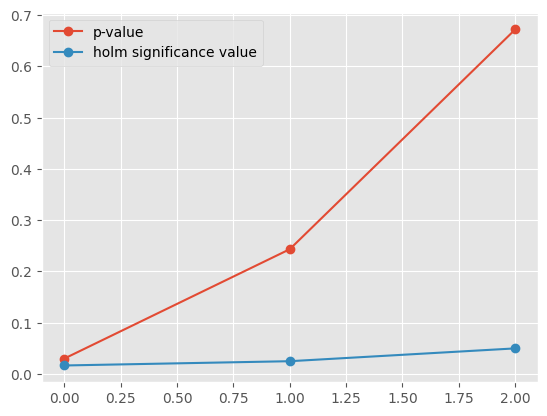

In [20]:
plt.plot(pval, 'o-',label='p-value')
plt.plot(alpha/correction, 'o-', label='holm significance value')
plt.legend()
plt.show()

Все три гипотезы о равенстве смертностей не отвергаются.

### Метод Бенджамини-Хохберга

In [21]:
rejected, p_corrected, _, _ = multipletests(pval,
                                            alpha = alpha,
                                            method = 'fdr_bh')
p_corrected

array([0.09026015, 0.36514799, 0.67209806])

In [22]:
pval

array([0.03008672, 0.24343199, 0.67209806])

In [23]:
p_corrected > 0.05 # TRUE - не отвергается

array([ True,  True,  True])

In [24]:
correction = np.arange(1,4,1)/3
pval / correction

array([0.09026015, 0.36514799, 0.67209806])

In [25]:
correction

array([0.33333333, 0.66666667, 1.        ])

Все три гипотезы о равенстве смертностей не отвергаются. В пакете есть и другие методы коррекции.

# Бутстрап

В этой тетрадке речь пойдёт про бустрап.

* [Статья про бустрэп от Станислава Анатольева](http://quantile.ru/03/03-SA.pdf)
* [Неплохая статья про бутстрап в R, на основе которой делалась тетрадка](https://moderndive.com/8-confidence-intervals.html)

In [26]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Д.И. для среднего (пример про копилку)



In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![](https://d33wubrfki0l68.cloudfront.net/fe3d13cf8652057fd5ea97fc4d7db1f00b2b1f34/62975/images/sampling/pennies/deliverable/3.jpg)

Пусть есть копилка с монетами. Как именно распределён возраст этих монет?

Я сделал из копилки случайную выборку из сотни десятирублёвых монет и записал дату с каждой в файл `money.csv`.



In [28]:
x = pd.read_csv('/content/drive/MyDrive/DS12_2023/data/money.csv').fielddate.values
x

array([2011, 2017, 2016, 2012, 2017, 2015, 2011, 2015, 2017, 2012, 2019,
       2019, 2012, 2018, 2018, 2018, 2018, 2017, 2018, 2012, 2010, 2012,
       2012, 2011, 2011, 2012, 2011, 2017, 2017, 2016, 2012, 2012, 2017,
       2017, 2012, 2010, 2018, 2016, 2011, 2017, 2012, 2017, 2013, 2017,
       2010, 2011, 2018, 2015, 2011, 2018, 2012, 2013, 2009, 2017, 2017,
       2018, 2019, 2018, 2011, 2013, 2011, 2013, 2017, 2018, 2011, 2012,
       2018, 2012, 2019, 2018, 2011, 2017, 2019, 2019, 2019, 2012, 2011,
       2013, 2011, 2017, 2013, 2013, 2017, 2017, 2017, 2011, 2019, 2013,
       2017, 2012, 2009, 2010, 2010, 2020, 2019, 2020, 2020, 2019, 2018,
       2020])

In [29]:
x = 2023 - x # перешли к возрасту
x

array([12,  6,  7, 11,  6,  8, 12,  8,  6, 11,  4,  4, 11,  5,  5,  5,  5,
        6,  5, 11, 13, 11, 11, 12, 12, 11, 12,  6,  6,  7, 11, 11,  6,  6,
       11, 13,  5,  7, 12,  6, 11,  6, 10,  6, 13, 12,  5,  8, 12,  5, 11,
       10, 14,  6,  6,  5,  4,  5, 12, 10, 12, 10,  6,  5, 12, 11,  5, 11,
        4,  5, 12,  6,  4,  4,  4, 11, 12, 10, 12,  6, 10, 10,  6,  6,  6,
       12,  4, 10,  6, 11, 14, 13, 13,  3,  4,  3,  3,  4,  5,  3])

Посмотрим как распределён возраст.

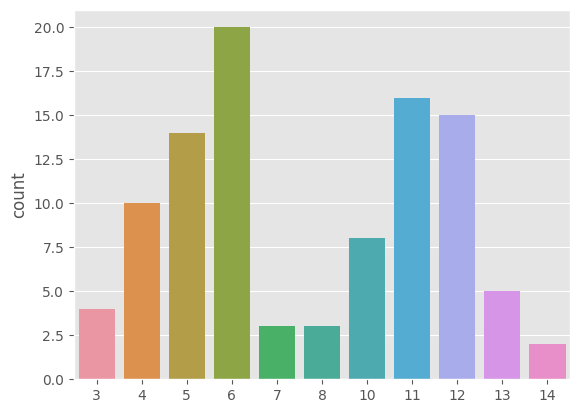

In [32]:
sns.countplot(x=x);
#sns.histplot(x, bins=12);

Распределение оказывается нестандартным. Видно, что у него есть две моды. Посмотрим на средний возраст монет.

In [33]:
x.mean()

8.16

In [34]:
np.median(x)

7.0

Интересно было бы построить для этого среднего доверительный интервал. Сделаем это с помощью бустрапа.

Напишем функцию для бустрапирования.

In [36]:
def get_bootstrap_sample(x, NB=1):
    N = x.size
    sample = np.random.choice(x, size=(N, NB), replace=True)

    if NB == 1:
        sample = sample.T[0]
    return sample

x_boot = get_bootstrap_sample(x)
print("Boot",x_boot)
print("Original",x)

Boot [12 12  3  5  6  4  6 13  5  5  6  8  6  6  8  8  4  6 14  5  6  6  6 11
  4 10 12  5  5  5  5 12  6  6 12  7 10  6  3  7  3  6  5 12 12  6  3  4
 12 11  7 12  5  3  4 13 12  7 12  5  8  5 11 10  6  6 11  3 11  4 11  7
  5 10  6  6 11 11 13 11  6 11 13 11 12  5 10 11 12 11 13 12 12 12  6 13
  3  6  5 11]
Original [12  6  7 11  6  8 12  8  6 11  4  4 11  5  5  5  5  6  5 11 13 11 11 12
 12 11 12  6  6  7 11 11  6  6 11 13  5  7 12  6 11  6 10  6 13 12  5  8
 12  5 11 10 14  6  6  5  4  5 12 10 12 10  6  5 12 11  5 11  4  5 12  6
  4  4  4 11 12 10 12  6 10 10  6  6  6 12  4 10  6 11 14 13 13  3  4  3
  3  4  5  3]


Давайте сравним распределение выборки, которую мы сэмплировали с исходной.

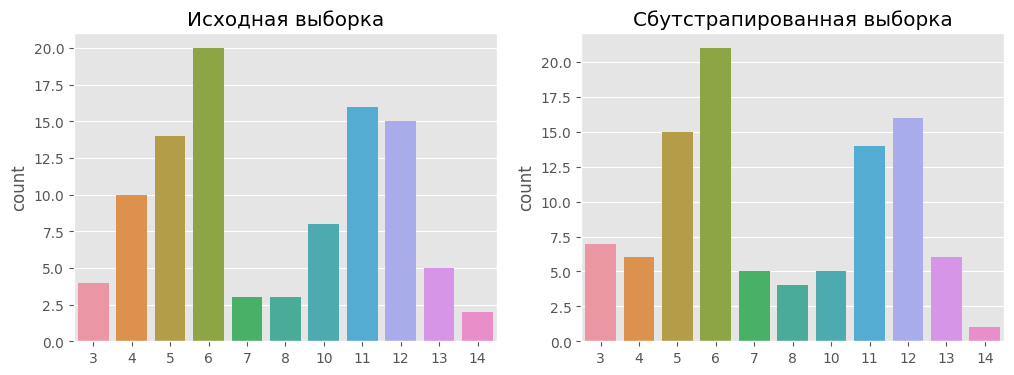

In [37]:
_, axes = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x=x, ax=axes[0])
sns.countplot(x=x_boot, ax=axes[1])
axes[0].set_title("Исходная выборка")
axes[1].set_title("Сбутстрапированная выборка");

Сгенерируем выборку из средних.

In [39]:
# генерируем 1 миллион выборок размера 100
x_boot = get_bootstrap_sample(x, NB=10**6)
x_boot.shape

(100, 1000000)

In [40]:
x_boot_m = np.mean(x_boot, axis=0)
x_boot_m

array([8.15, 8.12, 8.69, ..., 7.63, 8.23, 8.26])

In [41]:
x_boot_med = np.quantile(x_boot, 0.50, axis=0)
x_boot_med

array([ 6.,  7., 10., ...,  6.,  7.,  7.])

In [42]:
x_boot_m.shape

(1000000,)

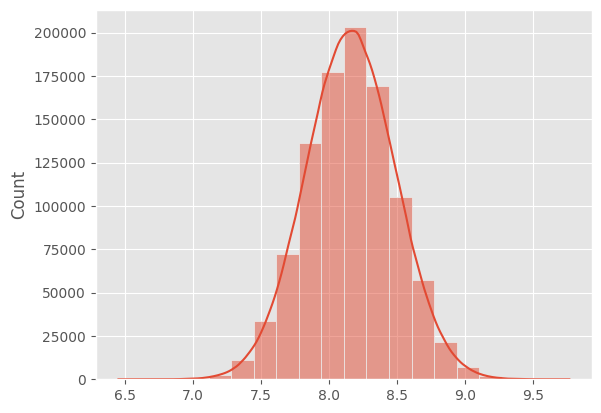

In [43]:
sns.histplot(x_boot_m, bins=20, kde=True);

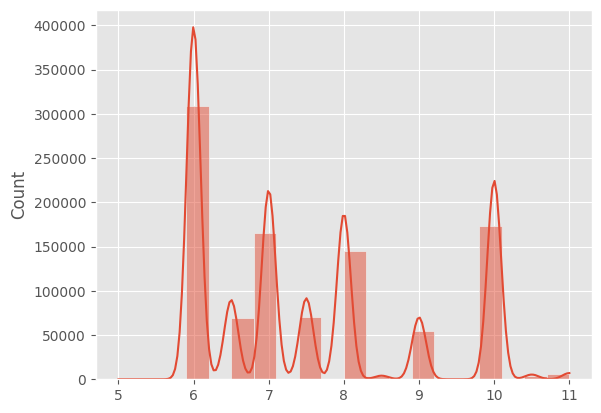

In [44]:
sns.histplot(x_boot_med, bins=20, kde=True);

Сравним получившееся распределение с нормальным. Они оказываются похожи. Это связано с тем, что мы бустрапируем среднее, в возрасте монет нет выбросов, поэтому тут хорошо работает ЦПТ.

### Д.И. Эфрона

Построим доверительный интервал для среднего.

In [45]:
alpha = 0.05

# посчитали 1 миллион средних по каждой из бутстраппированных выборок
x_boot_m = np.mean(x_boot, axis=0)

lower = np.quantile(x_boot_m, alpha/2)
upper = np.quantile(x_boot_m, 1-alpha/2)
lower, upper

(7.52, 8.8)

In [46]:
upper-lower

1.2800000000000011

In [47]:
d = 1.96*(x.var(ddof=1)/x.size)**0.5
x.mean() - d, x.mean() + d

(7.512801163677365, 8.807198836322636)

In [48]:
2*d

1.2943976726452715

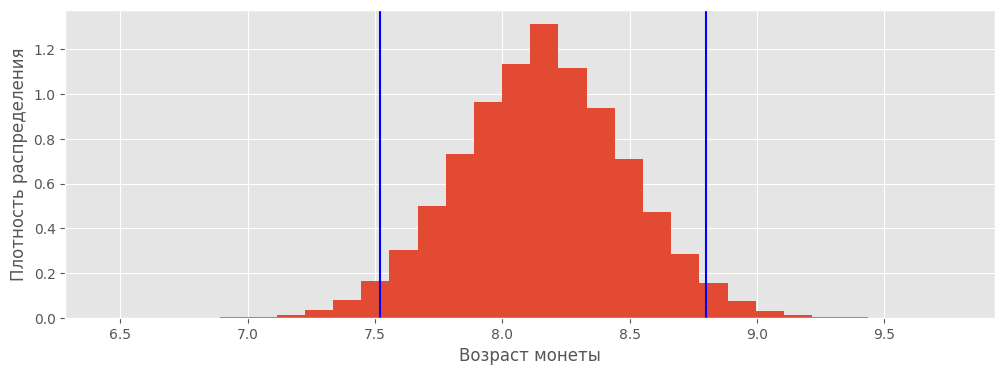

In [49]:
fig = plt.figure(figsize=(12,4))
plt.hist(x_boot_m, bins=30, density=True)
plt.axvline(lower, color='b')
plt.axvline(upper, color='b');

plt.xlabel('Возраст монеты')
plt.ylabel('Плотность распределения');

### Д.И. Холла

In [51]:
alpha = 0.05

# сначала фиксируем глобальное среднее по всей выборке
theta_hat = np.mean(x)

x_boot = get_bootstrap_sample(x, NB=10**6)

# центрируем с помощью глобального среднего
x_boot_centered = x_boot - theta_hat

# снова считаем статистику по центрированным бутстраппированным выборкам
bias_boot = np.mean(x_boot_centered, axis=0)


# считаем квантили и вычитаем/прибавляем от глобальгого среднего
lower = theta_hat - np.abs(np.quantile(bias_boot, alpha/2))
upper = theta_hat + np.abs(np.quantile(bias_boot, 1-alpha/2))

lower, upper

(7.520000000000001, 8.81)

In [ ]:
upper - lower

###  t-процентильный Д.И.

In [53]:
# сначала фиксируем глобальное среднее и выборочную дисперсию по всей выборке
theta_hat = np.mean(x)
std_hat = np.std(x)

# делаем бутстрап-выборки
x_boot = get_bootstrap_sample(x, NB=10**6)

# центрируем (вычитаем глобальное среднее)
x_boot_centered = x_boot - theta_hat
x_boot_t = np.mean(x_boot_centered, axis=0)

# считаем ст. отклонение по каждой бутстрап-выборке
x_boot_std = np.std(x_boot, axis=0)
# стандартизуем
x_boot_t /= x_boot_std


lower = theta_hat - np.abs(np.quantile(x_boot_t, alpha/2))*std_hat
upper = theta_hat + np.abs(np.quantile(x_boot_t, 1-alpha/2))*std_hat
lower, upper

(7.499332292587452, 8.812392888839025)

In [54]:
upper - lower

1.3130605962515727

Последний доверительный интервал получился пошире. [Теория показывает,](http://quantile.ru/03/03-SA.pdf) что последний способ даёт более низкую ошибку в плане асимптотики.

## Д.И. для медианы (цитаты и репосты)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её не грех репостнуть на стеночку. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она получит лайк повышается. Например, цитату

> Можно простить человеку все, кроме отсутствия. (Экзюпери)

мне не очень хотелось бы лайкать. А вот цитата

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков)

совершенно другое дело.

В табличке `df_vk_wise` лежат даныне о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено и будем работать с остатками.

In [55]:
df = pd.read_csv('/content/drive/MyDrive/DS12_2023/data/df_vk_wise.csv')
df['likes1'] = df['likes'] + 1
df.head()

,likes,reposts,text,I,likes1
0,7,0,Кому удобнее следить за новостями М. в инстагр...,False,8
1,575,25,"Если девушка невероятно хороша в юности, но ра...",False,576
2,509,57,"То была очень обычная узость мышления - те, кт...",False,510
3,542,15,"Когда он знакомил меня с Сергеем, тот спросил:...",False,543
4,949,59,"- Общепризнано, сэр, что физические упражнения...",False,950


Построим гистограмму для числа репостов постов, содержащих личные местоимения и не содержащих.

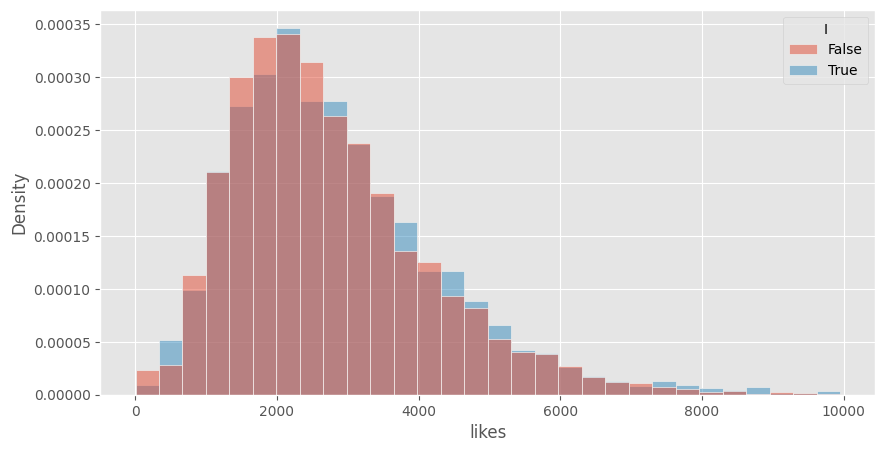

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(df.query('likes<10000'),
             x='likes',
             hue='I',
             bins=30,
             common_norm=False,
             stat='density',
            );

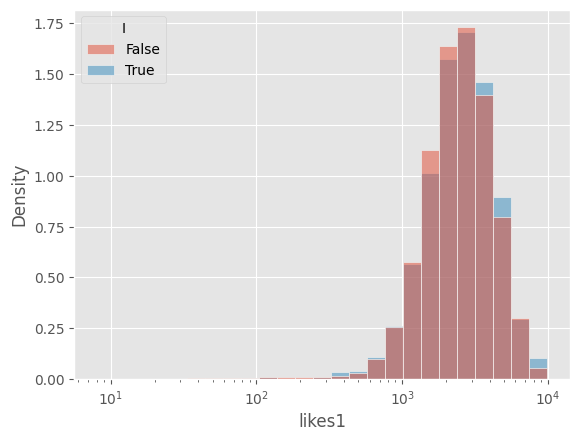

In [57]:
sns.histplot(df.query('likes<10000'),
             x='likes1',
             hue='I',
             bins=25,
             common_norm=False,
             stat='density',
             log_scale=True
            );

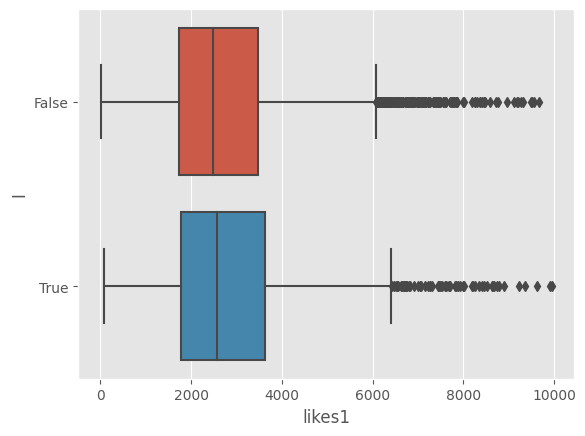

In [58]:
sns.boxplot(data=df.query('likes<10000'),
             x='likes1',
             y='I', orient='h'
            );

In [59]:
x = df[df['I']== True]['likes'].values
y = df[df['I']== False]['likes'].values

In [60]:
np.median(x), np.median(y)

(2580.5, 2490.0)

Хвосты на гистограммах оказываются очень длинными. У нас есть выбросы. Смотреть на средние, чтобы сравнить между собой разные цитаты, будет некорректно. Будем смотреть на медианы. Построим доверительный интервал для разности медиан.

In [62]:
x_boot = get_bootstrap_sample(x, NB=10**4)
x_boot = np.median(x_boot, axis=0)

y_boot = get_bootstrap_sample(y, NB=10**4)
y_boot = np.median(y_boot, axis=0)

In [63]:
def stat_intervals(boot, alpha=0.05):
    lower = np.quantile(boot, alpha/2)
    upper = np.quantile(boot, 1-alpha/2)
    return lower, upper

In [64]:
stat_intervals(x_boot)

(2516.0, 2657.5)

In [65]:
stat_intervals(y_boot)

(2458.0, 2526.0)

Доверительные интервалы пересекаются. Но делать вывод лучше по доверительному интервалу для разности. Такая процедура будет мощнее.

In [66]:
stat_intervals(x_boot - y_boot)

(15.0, 170.0)

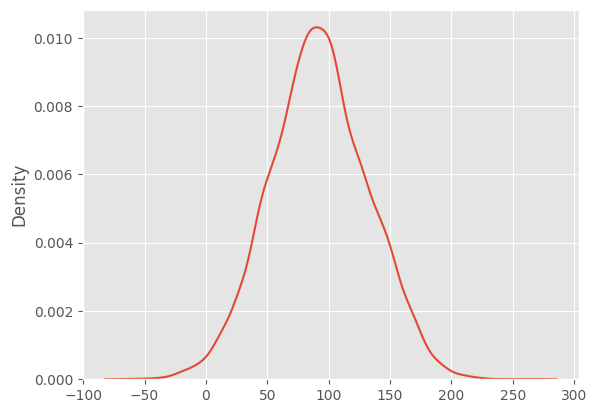

In [67]:
sns.kdeplot(x_boot - y_boot);

Ноль не попадает в доверительный интервал, значит на уровне значимость $5\%$ разница есть. На последок посмотрим на вероятность того, что разность больше нуля.

In [69]:
1-np.mean(x_boot - y_boot > 0)

0.009700000000000042